<a href="https://colab.research.google.com/github/meryamhzamiensi/Quantum-Enhanced-Deep-Learning-for-Precision-Drug-Design-in-Breast-Cancer-Treatment/blob/ML-models/PCD_classic_RandomForest100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Étape 1 : Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
import tracemalloc
import psutil
import os

In [ ]:
def track_memory_usage():
    """
    Track memory usage of the current process

    Returns:
    dict: Memory usage statistics
    """
    process = psutil.Process(os.getpid())
    memory_info = process.memory_info()

    return {
        'rss_mb': memory_info.rss / (1024 * 1024),  # Resident Set Size in MB
        'vms_mb': memory_info.vms / (1024 * 1024),  # Virtual Memory Size in MB
    }

In [ ]:
def calculate_detailed_errors(y_test, y_pred):
    """
    Calculate detailed error metrics

    Parameters:
    y_test (array): True labels
    y_pred (array): Predicted labels

    Returns:
    dict: Error analysis metrics
    """
     # Convert encoded labels back to drug names
    y_test_names = y_test
    y_pred_names = y_pred

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_names, y_pred_names)

    # Detailed error analysis
    error_analysis = {
        'total_samples': len(y_test),
        'misclassified_samples': np.sum(y_test != y_pred),
        'misclassification_rate': 1 - accuracy_score(y_test, y_pred),
        'confusion_matrix': conf_matrix
    }

    # Per-drug error analysis
    drug_error_details = {}
    unique_drugs = np.unique(y_test_names)

    for drug in unique_drugs:
        drug_mask = (y_test_names == drug)
        drug_true = y_test_names[drug_mask]
        drug_pred = y_pred_names[drug_mask]

        drug_error_details[drug] = {
            'total_samples': len(drug_true),
            'correct_predictions': np.sum(drug_true == drug_pred),
            'incorrect_predictions': np.sum(drug_true != drug_pred),
            'accuracy': accuracy_score(drug_true, drug_pred)
        }

    error_analysis['per_drug_details'] = drug_error_details

    return error_analysis

In [ ]:
# Load the dataset
breast_cancer_data = pd.read_csv('processed_dataset.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 7. Prepare target variable (binned LN_IC50)
y = pd.cut(
        breast_cancer_data['LN_IC50'],
        bins=5,
        labels=['very_low', 'low', 'medium', 'high', 'excellent']
    )
print("\nTarget class distribution:")
print(y.value_counts())

    # Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#     # 8. Prepare features
# X = breast_cancer_data.drop(columns=['LN_IC50'])

# Étape 8 : Préparer X et y
y = label_encoder.fit_transform(
    pd.cut(
        breast_cancer_data['LN_IC50'],
        bins=5,
        labels=['very_low','low','medium','high','excellent']
    )
)

# On supprime la colonne LN_IC50 de X
X = breast_cancer_data.drop(columns=['LN_IC50'])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

    # 9. Split data
X_train, X_test, y_train, y_test = train_test_split(
X, y_encoded,
test_size=0.2,
random_state=42,
stratify=y_encoded  # Maintain class distribution
    )

print(f"\nFinal dataset shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")



Target class distribution:
LN_IC50
medium       6726
high         4457
low          1428
very_low      340
excellent     155
Name: count, dtype: int64

Final dataset shapes:
X_train: (10484, 503), y_train: (10484,)
X_test: (2622, 503), y_test: (2622,)


In [ ]:
# Start memory tracking
tracemalloc.start()

In [ ]:
# Initial memory snapshot
initial_memory = track_memory_usage()
print("Initial Memory Usage:")
print(f"RSS: {initial_memory['rss_mb']:.2f} MB")
print(f"VMS: {initial_memory['vms_mb']:.2f} MB")

Initial Memory Usage:
RSS: 433.31 MB
VMS: 1770.44 MB


In [ ]:
start_time = time.time()

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
print("\nTraining Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training completed.")



Training Random Forest model...
Model training completed.


In [ ]:
# Étape 13 : Temps & mémoire
end_time = time.time()
execution_time = end_time - start_time
print(f"\nExecution time: {execution_time:.2f} seconds")

final_memory = track_memory_usage()
print("Final Memory Usage:")
print(f"RSS: {final_memory['rss_mb']:.2f} MB")
print(f"VMS: {final_memory['vms_mb']:.2f} MB")


Execution time: 6.60 seconds
Final Memory Usage:
RSS: 478.47 MB
VMS: 1850.45 MB


In [ ]:
# Get memory allocation details
current, peak = tracemalloc.get_traced_memory()
print(f"\nCurrent memory usage: {current / 10**6:.2f} MB")
print(f"Peak memory usage: {peak / 10**6:.2f} MB")
tracemalloc.stop()


Current memory usage: 0.44 MB
Peak memory usage: 63.45 MB


Accuracy: 0.9576659038901602

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.96      0.95      0.95       892
           2       0.95      0.94      0.95       286
           3       0.95      0.97      0.96      1345
           4       0.95      0.93      0.94        68

    accuracy                           0.96      2622
   macro avg       0.96      0.94      0.95      2622
weighted avg       0.96      0.96      0.96      2622



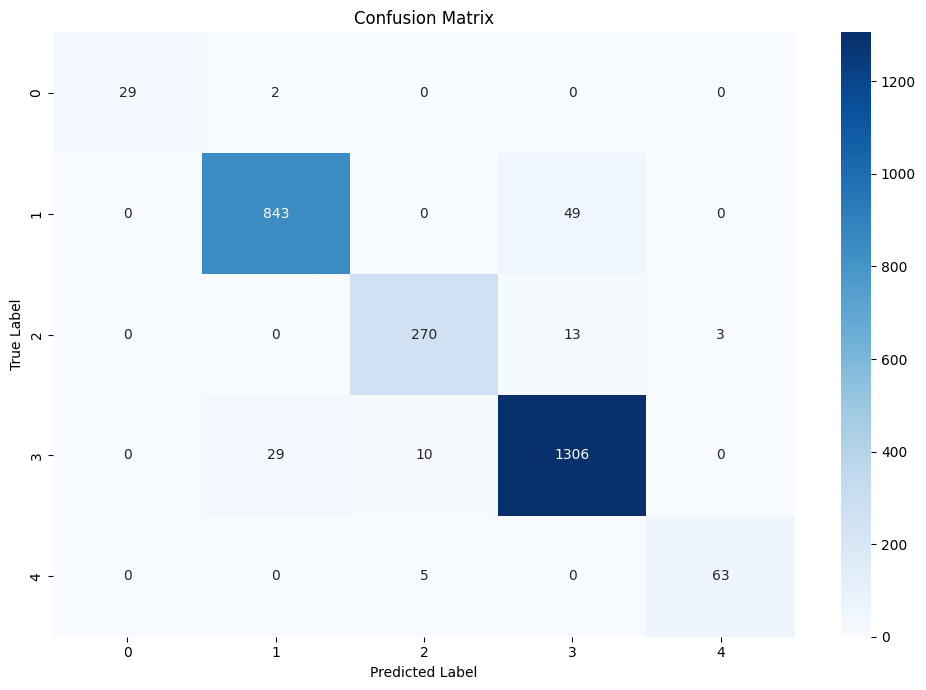

In [ ]:
#Étape 10 : Prédiction
y_pred = rf_model.predict(X_test)

# Étape 11 : Évaluation du modèle
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


 # Evaluate the model directly using y_pred and y_test (no inverse_transform)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix Visualization
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Remplace ‘model’ par rf_model (le nom de ta variable)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Modèle enregistré dans rf_100_model.pkl")


Modèle enregistré dans rf_100_model.pkl
